# GROUP 7
### Names: Hailey DeMark, Deborah Park, Karis Park
### StudentIDs: 48869449 , 48878679, 48563429

# Business Understanding 

### The dataset comes from the BRFSS 2015 survey, which collects information about people's health. It includes data like whether someone has diabetes, high blood pressure, high cholesterol, their BMI, smoking habits, physical activity, and access to healthcare. The purpose of collecting this data is to understand health problems in the population and help create better public health programs. The goal of this dataset is to predict if a person has diabetes or not based on their health information. This is useful for hospitals, public health groups, and insurance companies to find people at risk, make policies, and manage health costs. For the prediction model to be helpful, it needs to be very accurate reaching an accuracy of at least 97%, especially because it's identifying people who might have diabetes which directly relates to our health. Additionaly, the model should be easy to understand for making good decisions regarding the diagnosis and treatment plans afterwards.

### Link to data: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset 

# Data Understanding
### **Variable/Type**
- **Diabetes_binary / Binary**
  - 0 = no deabetes
  - 1 = prediabetes or diabetes
- **HighBP / Binary**
  - 0 = no high BP
  - 1 = high BP
- **HighChol / Binary**
  - 0 = no high cholesterol
  - 1 = high cholesterol
- **CholCheck / Binary**
  - 0 = no cholesterol check in 5 years
  - 1 = yes cholesterol check in 5 years
- **BMI / Integer**
  - Body Mass Index
- **Smoker / Binary**
  - Have you smoked at least 100 cigarettes in your entire life
  - 0 = no
  - 1 = yes
- **Stroke / Binary**
  - Even told you had a stoke
  - 0 = no
  - 1 = yes
- **HeartDiseaseorAttack / Binary**
  - Coronary hear disease (CHS) or myocardial infarction (MI)
  - 0 = no
  - 1 = yes
- **PhysActivity / Binary**
  - Physical actibity in past 30 days - not including job
  - 0 = no
  - 1 = yes
- **Fruits / Binary**
  - Consume fruit 1 or more times per day
  - 0 = no
  - 1 = yes
- **Veggies / Binary**
  - Consume vegetables 1 or more times per day
  - 0 = no
  - 1 = yes
- **HvyAlcoholConsump / Binary**
  - Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)
  - 0 = no
  - 1 = yes
- **AnyHealthcare**
  - Have any kind of health care converage, including health insurance, prepain plans such as HMO, etc.
  - 0 = no
  - 1 = yes
- **NoDocbcCost / Binary**
  - Was there a time in the past 12 months when you needed to see a doctor but could not because of cost?
  - 0 = no
  - 1 = yes
- **GenHlth / Categorical**
  - Would you say that in general your health is: scale 1-5
  - 1 = excellent
  - 2 = very good
  - 3 = good
  - 4 = fair
  - 5 = poor
- **MentHlth / Integer**
  - Now thinkning about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?
  - Scale 1-30 days
- **PhysHlth / Integer**
  - Now thinking about year physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?
  - Scale 1-30 days
- **DiffWalk / Binary**
  - Do you have serious difficulty walking or climbing stairs?
  - 0 = no
  - 1 = yes
- **Sex / Binary**
  - 0 = female
  - 1 = male
- **Age / Categorical**
  - 13-level age category
  - 1 = 18-24
  - 9 = 60-64
  - 13 = 80 or older
- **Education / Categorical**
  - Education level scale 1-6
  - 1 = never attended school or only kindergardon
  - 2 = grades 1 through 8 (elementary)
  - 3 = grades 9 through 11 (some high school)
  - 4 = grades 12 or GED (high school graduate)
  - 5 = college 1 year to 3 years (some college or technical school)
  - 6 = college 4 yeas or more (college graduate)
- **Income / Integer**
- Income scale 1–8
  - 1 = less than \$10,000
  - 5 = less than \$35,000
  - 8 = \$75,000 or more


### *The dataset has no missing or duplicate data, which means it is clean and well-organized. There are no mistakes to fix, and this shows that the data was collected and prepared carefully, which make sense because it originates from a well-maintained source like the BRFSS survey. Since everything is complete, there is no need to remove or fill in any values. This allows us to focus directly on analyzing and using the data without any problems.

In [2]:
# import libraries
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

import copy

In [3]:
# load dataset
df = pd.read_csv("./diabetes_binary_health_indicators_BRFSS2015.csv")

# make a copy of the dataset to work with during analysis
df_copy = df
df_copy

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [4]:
# look at statistics of the data
df_copy.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [5]:
# check to see which data types each feature is
print(df_copy.dtypes)
print('===========')
print(df_copy.info())

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP    

In [6]:
# check for any null/nan values
df_copy.isnull().values.any()

False

<Axes: >

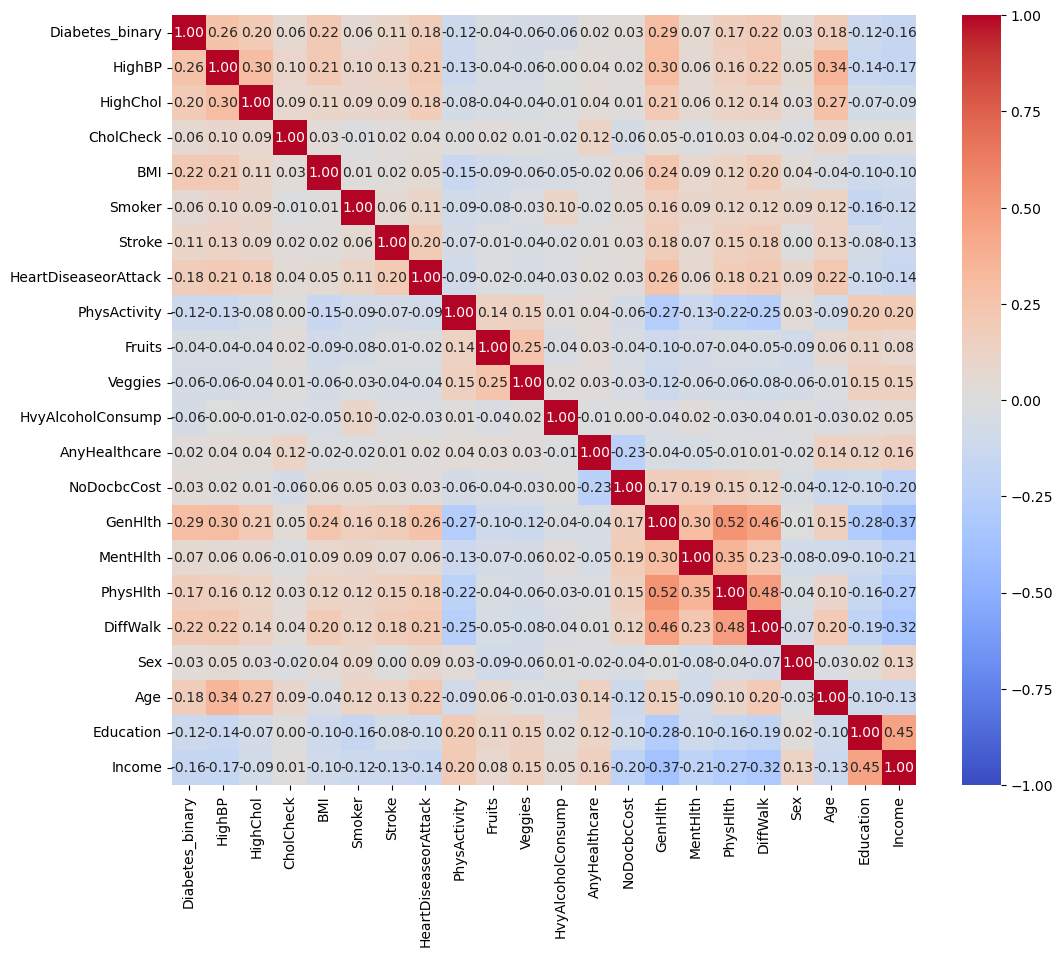

In [7]:
# create correlation matrix (ranging from -1 to 1)
cm = df_copy.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, cmap="coolwarm", fmt=".2f", vmin = -1, vmax = 1)

In [8]:
# cleaning the data 
for col in ['Veggies','Fruits','MentHlth','CholCheck', 'AnyHealthcare', 'NoDocbcCost']:
    if col in df_copy:
        del df_copy[col]

df_copy.info()

df_imputed = copy.deepcopy(df_copy)

df_imputed.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   BMI                   253680 non-null  float64
 4   Smoker                253680 non-null  float64
 5   Stroke                253680 non-null  float64
 6   HeartDiseaseorAttack  253680 non-null  float64
 7   PhysActivity          253680 non-null  float64
 8   HvyAlcoholConsump     253680 non-null  float64
 9   GenHlth               253680 non-null  float64
 10  PhysHlth              253680 non-null  float64
 11  DiffWalk              253680 non-null  float64
 12  Sex                   253680 non-null  float64
 13  Age                   253680 non-null  float64
 14  Education             253680 non-null  float64
 15  

,Diabetes_binary,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,GenHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,5.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,5.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,27.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,11.0,5.0,4.0


When cleaning the data, we used the correlation matrix to compare each variable's correlation to whether or not the patient had diabetes. When deleting the columns, we took the correlations into account, dropping columns with almost no correlation with the presence of diabetes in the patient.

# Data Visualization 

### Visualization #1:

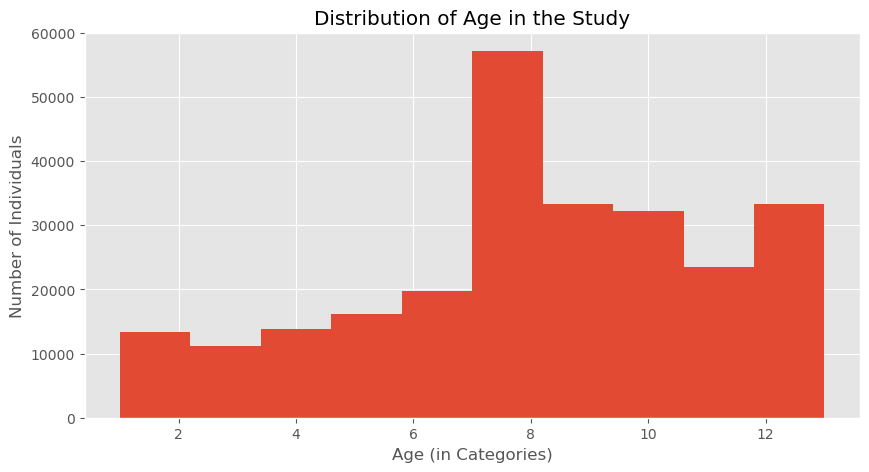

In [9]:
# Visualization 1 - Distribution of Age

# there is 0.18 correlation between age and diabetes 
plt.style.use('ggplot')

fig = plt.figure(figsize=(10,5))

df_imputed.Age.plot.hist()
plt.title('Distribution of Age in the Study')
plt.xlabel("Age (in Categories)")
plt.ylabel('Number of Individuals')

plt.show()

#### Analyzation:

The x-axis represents the categories of age, ranging from 1 to 13. Category 1 corresponds to people aged 18-24, category 9 represents ages 60-64, and category 13 represents ages 80 and older. The y-axis displays the number of individuals in each age group. The graph is slightly shewed left, indicating that a larger proportion of the survey participants are middle-aged or older. The tallest bar, which has over 50,500 and less than 60,000 participants, shows that the majority of the people recorded in this study are around ages 40-60. This graph indicates that this study may focus more on middle-aged and older individuals or this is the population's age distribution at the time of the study.  

### Visualization #2:

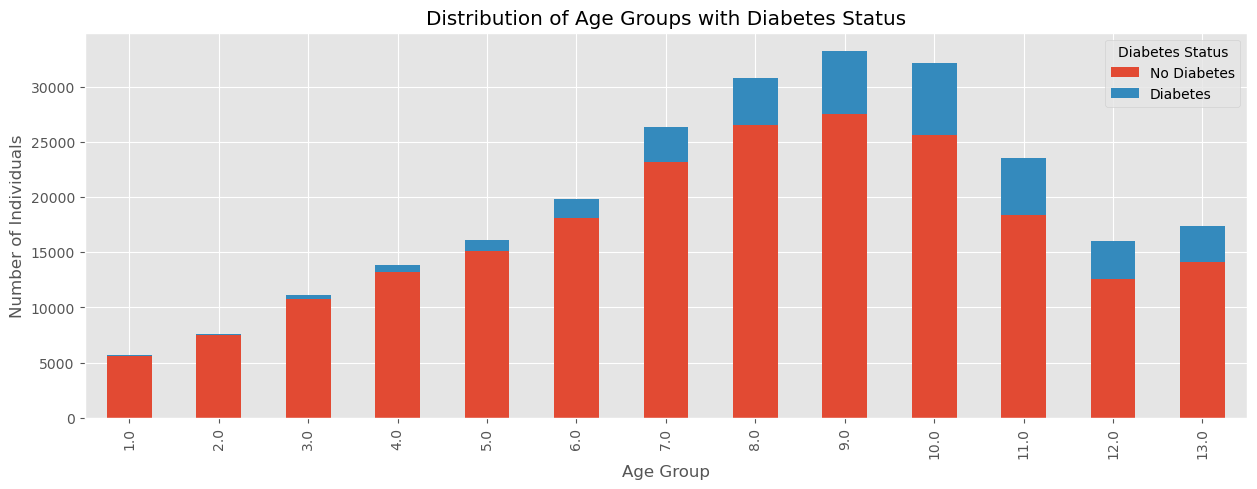

In [46]:
# Now, seeing the distribution of age compared to the number of people with/without diabetes in each age group 

# Visualization 2 - Crosstab for Age and Diabetes_binary
age_diabetes_crosstab = pd.crosstab(df_imputed['Age'], df_imputed.Diabetes_binary.astype(bool))

age_diabetes_crosstab.plot(kind='bar', stacked=True, figsize=(15, 5)) # plot crosstab 

# labels
plt.title('Distribution of Age Groups with Diabetes Status')
plt.xlabel('Age Group')
plt.ylabel('Number of Individuals')
plt.legend(['No Diabetes', 'Diabetes'], title='Diabetes Status')

plt.show()

#### Analyzation:

This stacked bar chart shows the distribution of people with and without diabetes in each age group. Most of the individuals in each age group do not have diabetes. However, the proportion of people with diabetes increases with the age group, starting at around age group 6, which includes ages around 40 and older. Groups 9 and 10 (around 60–69 years between the two groups), have the higest individuals in the study, but they also have the largest group of people with diabetes. This graph suggests that the likelihood of diabetes may increase with age.

### Visualization #3:

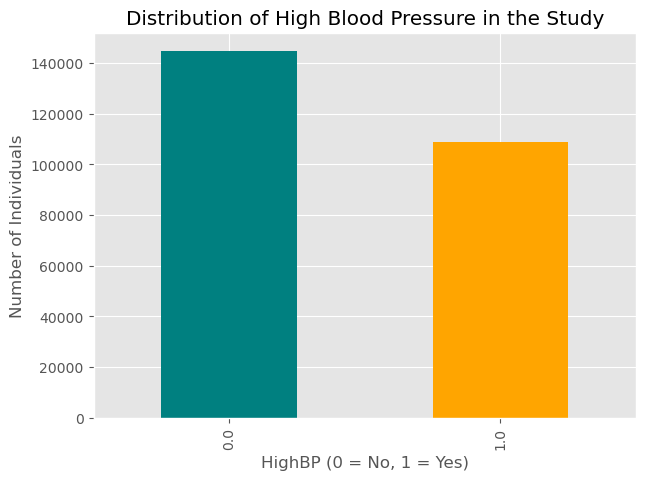

In [11]:
# Distribution of HighBP individuals in the study 
fig = plt.figure(figsize=(7, 5))
df_imputed['HighBP'].value_counts().plot(kind='bar', color=['teal', 'orange'])

# labels
plt.title('Distribution of High Blood Pressure in the Study')
plt.xlabel('HighBP (0 = No, 1 = Yes)')
plt.ylabel('Number of Individuals')

plt.show()


#### Analyzation:
This bar chart shows the number of individuals in the study with high blood pressure compared to those with normal blood pressure. The x-axis represents blood pressure with 0 representing normal blood pressure and 1 representing high blood pressure. The y-axis shows the number of individuals in each category. There are over 140,000 people with normal blood pressure in this study, compared to just under 110,000 individuals with high blood pressure. While the majority of participants have normal blood pressure, a significant amount of the study population has high blood pressure. 

### Visualization #4:

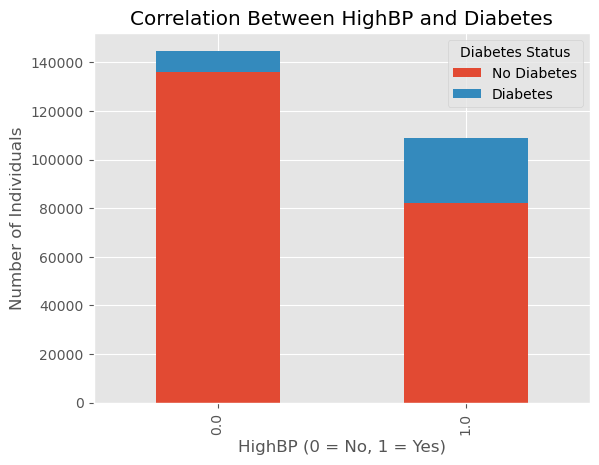

In [47]:
# Visualization 4 - Correlation between HighBP and Diabetes_binary 
pd.crosstab([df_imputed['HighBP']], # categories to cross tabulate
            df_imputed.Diabetes_binary.astype(bool)).plot(kind='bar', stacked=True)

# labels
plt.title('Correlation Between HighBP and Diabetes')
plt.xlabel('HighBP (0 = No, 1 = Yes)')
plt.ylabel('Number of Individuals')
plt.legend(['No Diabetes', 'Diabetes'], title='Diabetes Status')

plt.show()

#### Analyzation:
Individuals with high blood pressure (HighBP = 1.0) are more likely to have diabetes (Diabetes_binary = True) compared to those without high blood pressure (HighBP = 0.0). While the majority of individuals in both categories do not have diabetes, the proportion of diabetes cases is noticeably higher among those with high blood pressure.

### Visualization #5:

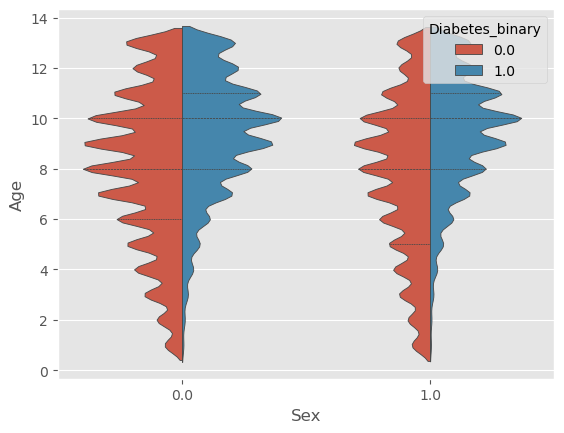

In [48]:
# Visualization 5 - Correlation between Age and Diabetes_binary grouped by Sex 

sns.violinplot(x="Sex", y="Age", hue="Diabetes_binary", data=df_imputed,
               split=True, # split across violins
               inner="quart", # show innner stats like mean, IQR,
               density_norm="count") # scale the size of the plot by the count within each group

plt.show()

#### Analyzation:
This population pyramid visualization compares the distribution of age and diabetes status (Diabetes_binary) across two genders (Sex: 0.0 (Female)  and 1.0 (Male)). It reveals that diabetes (Diabetes_binary = 1.0) is more prevalent in older age groups across both genders, with the non-diabetic population (Diabetes_binary = 0.0) dominating younger age groups. The age distribution appears relatively balanced between genders, suggesting no significant gender disparity in diabetes prevalence by age.

### Visualization #6:

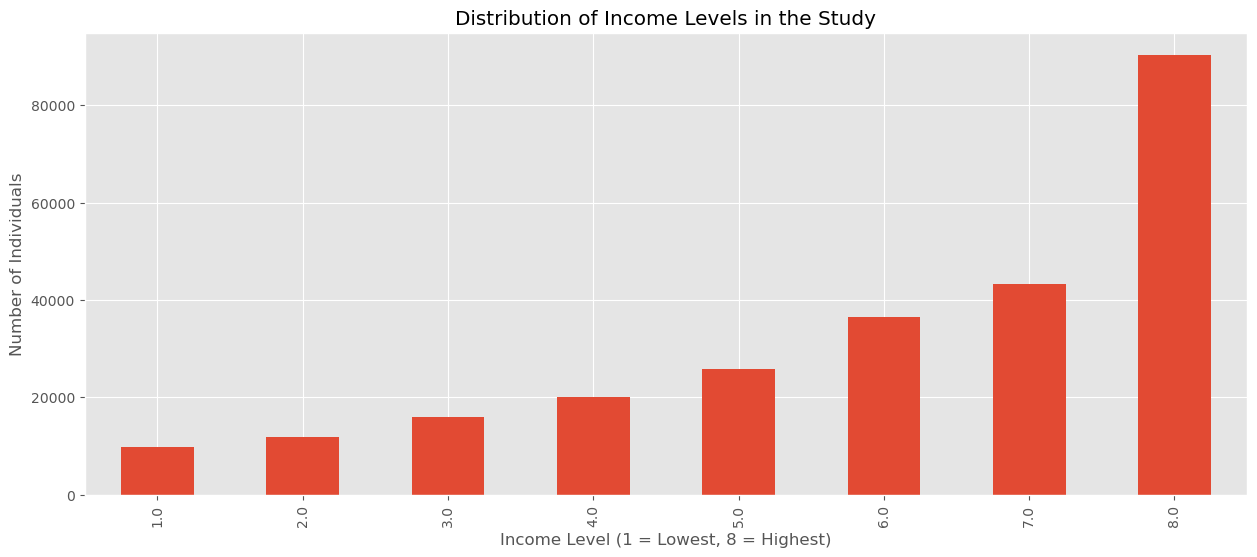

In [53]:
# Visualization 6 - Shwoing distribution of income 
plt.figure(figsize=(15, 6))
df_imputed['Income'].value_counts(sort=False).sort_index().plot(kind='bar')

# labels 
plt.title('Distribution of Income Levels in the Study')
plt.xlabel('Income Level (1 = Lowest, 8 = Highest)')
plt.ylabel('Number of Individuals')
plt.show()


#### Analyzation:

In this graph, the x-axis shows categories of income level for each individual. Category 1 represents less than 75,000 or more. Most of the participants in the study have higher incomes since the bar chart depicts the number of individuals growing as the categories increase. Level 8, which is the highest income group, includes over 80,000 individuals. In contrast, lower income levels (1–3) are underrepresented, each with fewer than 20,000 participants. This graph is left skewed which suggests a possible imbalance of income in participants that could influence analyses of health outcomes. Income can be linked to the access individuals have to high quality healthcare resources and lifestyle factors.

### Visualization #7:

<Figure size 1000x600 with 0 Axes>

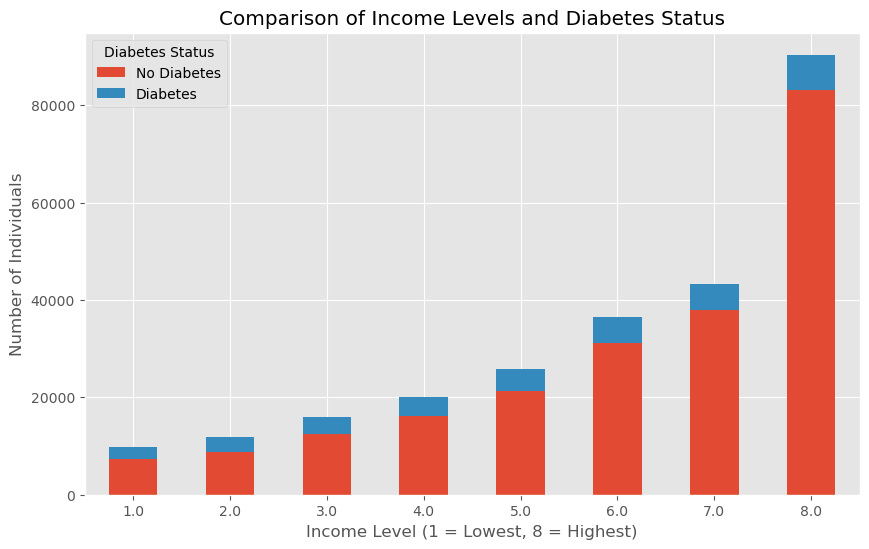

In [54]:
# crosstab for income and diabetes
income_diabetes_crosstab = pd.crosstab(df_imputed['Income'], df_imputed['Diabetes_binary'].astype(bool))

plt.figure(figsize=(10, 6))
income_diabetes_crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))  # plot stacked bar chart 

# Add labels and title
plt.title('Comparison of Income Levels and Diabetes Status')
plt.xlabel('Income Level (1 = Lowest, 8 = Highest)')
plt.ylabel('Number of Individuals')
plt.legend(['No Diabetes', 'Diabetes'], title='Diabetes Status')
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal
plt.show()

#### Analyzation:

In this stacked bar plot, we can see that the number of people with and without diabetes across each income category. Higher income groups (6-8) have significantly fewer people with diabetes compared to those than without diabetes compared to the individals in their category. This could be because they can afford better healthcare or healthier lifestyle choices. In lower income groups (1-3), the ratio of people that have diabetes to those without becomes more balanced, although people without diabetes still outnumber those with diabetes in all categories. This trend suggests that higher income may be associated with a reduced likelihood of developing diabetes.

### Visualization #8:

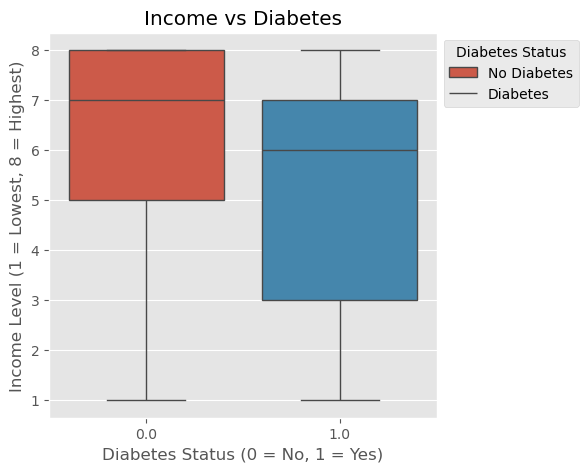

In [55]:
# side to side box plots 
plt.subplots(figsize=(5, 5))

sns.boxplot(x="Diabetes_binary", y="Income", data=df_imputed, hue="Diabetes_binary")

# labels 
plt.title('Income vs Diabetes')
plt.xlabel('Diabetes Status (0 = No, 1 = Yes)')
plt.ylabel('Income Level (1 = Lowest, 8 = Highest)')
plt.legend(['No Diabetes', 'Diabetes'], title='Diabetes Status', bbox_to_anchor=(1, 1))  #asked ChatGPT and google AI how to put the legend to the side of the boxplot since assigning the hue created one

plt.show()

#### Analyzation: 
This boxplot also shows the distribution of income levels for individuals with and without diabetes. Individuals without diabetes (0) generally have a higher median income and a broader IQR compared to those with diabetes (1). The income range for both groups overlaps significantly, but the group without diabetes includes more individuals in the higher income groups than individuals with diabetes. This implies that higher income levels may be associated with a lower likelihood of having diabetes, possibly due to better access to healthcare and healthier choices.

## Ask three interesting questions that are relevant to your dataset and explore visuals that help answer these questions. Use whichever visualization method is appropriate for your data.  Important: Interpret the implications for each visualization. //will be deleted before submission

### Q1. Is there different correlations between HighBP with Diabetes by their age group?

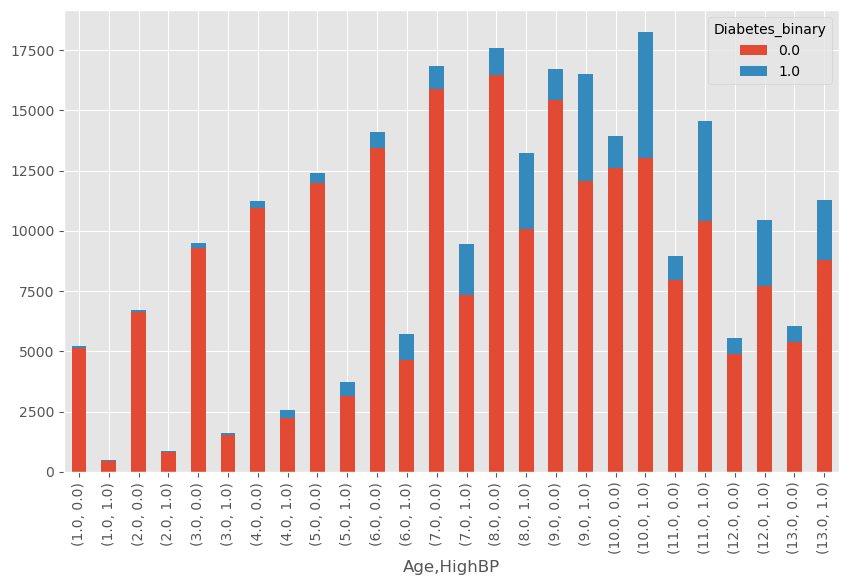

In [45]:
Q1 = df_imputed.groupby(["Age", "HighBP", "Diabetes_binary"]).size().unstack()
Q1.plot(kind="bar", stacked=True, figsize=(10, 6))

plt.show()


#### Analyzation:

There is consistent positive correlation between high blood pressure (HighBP) and diabetes (Diabetes_binary) across all age groups. In younger age groups, such as bar from (Agegroup = 1.0, HighBP = 0.0 (no)) to (Agegroup = 3.0, HighBP = 1.0 (yes)), which means , the prevalence of diabetes is generally lower overall, but individuals with HighBP are still more likely to have diabetes compared to those without HighBP. As age increases, particularly in the middle to older age groups (Agegroup 6.0 to 10.0 and beyond), the number of individuals with both HighBP and diabetes becomes more clear.

### Q2. //space for Karis

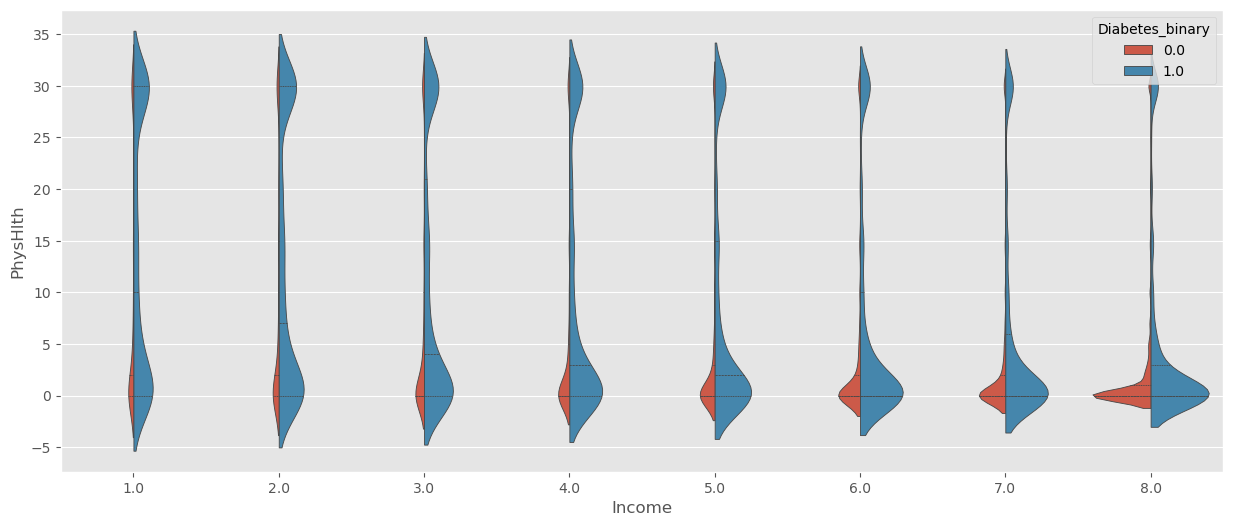

In [51]:
# Q2 - Correlation between Physical Health (PhysHlth) and Diabetes (Diabetes_binary) Grouped by Income

plt.figure(figsize=(15, 6))
sns.violinplot(x="Income", y="PhysHlth", hue="Diabetes_binary", data=df_imputed, 
               split=True, # split across violins
               inner="quart", # show innner stats like mean, IQR, 
               density_norm="count") # scale the size of the plot by the count within each group

plt.show()

#### Analyzation:
The violinplot above compares the distribution of the number of days felt unwell (PhysHlth) and having diabetes (Diabetes_binary) across income on a scale from 1 to 8 with 8 being the highest income. From here, we can see a negative correlation between income and physical health because as the income of the individual increases, the number of days (during the past 30 days) the individuals does not feel well increases. Additionally, the plot reveals that diabetes is fairly evenly distributed amongst those with better physical health regardless of income. This suggests that the presence of diabetes does not depend on the income of the individual as long as they have good physical health.

However, when looking at people with worse physical health (the number of days feeling unwell being 25 days or more), we can see that diabetes is more common in individuals with worse physical health compared to those with good physical health.

### Q3. // Space for Karis

In [ ]:
# Q3 - Relationship between Income and Diabetes (Diabetes_binary)
 
# horizontal bar chart
pd.crosstab([df_imputed['Income']], # categories to cross tabulate
            df_imputed.Diabetes_binary.astype(bool)).plot(kind='barh', stacked=True) 

plt.title('Frequency of Diabetes by Income')
plt.show()

#### Analyzation: // Need adjustment
From the horizontal bar graph, we can understand that the majority of individuals do not have diabetes regardless of income Additionally, nearly half of the people from whom the data was collected had a higher income, earning $75,000 or more. However, while the majority of individuals do not have diabetes, the proportion of people with diabetes is highest in those of lower income (Income = 1.0 - 3.0). This suggests that diabetes may be more prevalent in individuals with lower incomes compared to people with higher incomes.

# Exceptional Work
## The overall quality of the report as a coherent, useful, and polished product will be reflected here. Does it make sense overall? Do your visualizations answer the questions you put forth in your business analysis? Do you properly and consistently cite sources and annotate changes made to base code? Do you provide specific reasons for your assumptions? Do subsequent questions follow naturally from initial exploration?

### Answer Goes Here

## Additional analysis

In [19]:
# room for code

#### Analyzation goes here